In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [14]:
data = pd.read_csv("vectorized.csv", index_col=0)

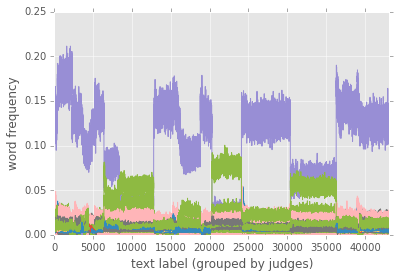

In [44]:
(data.iloc[:,2:]/3000).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [16]:
train_x = np.array(data.iloc[:,2:])
train_x = np.nan_to_num(train_x)
train_x = train_x/3000
train_y = np.array(data.iloc[:,0])

In [5]:
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import zero_one_loss

In [6]:
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [41]:
result = []
parameter = (3,10,30,50,100,200,300)
for a in parameter:
    round = []
    for file_n_train, file_n_val in ShuffleSplit(data.file_n.unique().shape[0], n_iter=5, test_size=0.2):
        idx_train = data.file_n.isin(file_n_train).as_matrix()
        idx_val = data.file_n.isin(file_n_val).as_matrix()
        clf = RandomForestClassifier(n_estimators=a, n_jobs=4)
        #clf = GaussianNB()
        clf.fit(train_x[idx_train], train_y[idx_train])
        g = clf.predict(train_x[idx_val])
        e_val = zero_one_loss(g, train_y[idx_val])
        round.append(e_val)
        print e_val
    result.append(round)
DFresult = pd.DataFrame(result)

0.0504597701149
0.0547126436782
0.0819540229885
0.092183908046
0.0662068965517
0.0294252873563
0.0355172413793
0.0606896551724
0.0280459770115
0.0205747126437
0.0145977011494
0.0296551724138
0.0394252873563
0.0162068965517
0.00195402298851
0.0185057471264
0.0112643678161
0.00655172413793
0.0032183908046
0.025632183908
0.00126436781609
0.0211494252874
0.0318390804598
0.00413793103448
0.0137931034483
0.0280459770115
0.00425287356322
0.000919540229885
0.0218390804598
0.00333333333333
0.0102298850575
0.0277011494253
0.00379310344828
0.0351724137931
0.0237931034483


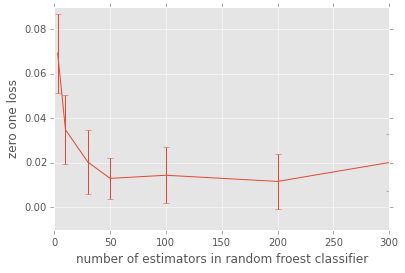

In [45]:
plt.errorbar(parameter, DFresult.T.mean(), yerr = DFresult.T.std())
plt.xlabel("number of estimators in random froest classifier")
plt.ylabel("zero one loss")
plt.savefig("random forester")

In [46]:
DFresult

,0,1,2,3,4
0,0.050460,0.054713,0.081954,0.092184,0.066207
1,0.029425,0.035517,0.060690,0.028046,0.020575
2,0.014598,0.029655,0.039425,0.016207,0.001954
3,0.018506,0.011264,0.006552,0.003218,0.025632
4,0.001264,0.021149,0.031839,0.004138,0.013793
5,0.028046,0.004253,0.000920,0.021839,0.003333
6,0.010230,0.027701,0.003793,0.035172,0.023793


In [64]:
result = []
parameter = (3,10,30,50,100,200,300)
for a in parameter:
    round = []
    for file_n_train, file_n_val in ShuffleSplit(data.file_n.unique().shape[0], n_iter=5, test_size=0.2):
        idx_train = data.file_n.isin(file_n_train).as_matrix()
        idx_val = data.file_n.isin(file_n_val).as_matrix()
        #clf = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=a)
        clf = BaggingClassifier( n_estimators=a, n_jobs=2)
        #clf = GaussianNB()
        clf.fit(train_x[idx_train], train_y[idx_train])
        g = clf.predict(train_x[idx_val])
        e_val = zero_one_loss(g, train_y[idx_val])
        round.append(e_val)
        print e_val
    result.append(round)
DFresult = pd.DataFrame(result)

0.0777011494253
0.0658620689655
0.0635632183908
0.0814942528736
0.0505747126437
0.0227586206897
0.0401149425287
0.0518390804598
0.0377011494253
0.0311494252874
0.0385057471264
0.0264367816092
0.0337931034483
0.0205747126437
0.015632183908
0.0514942528736
0.0247126436782
0.0467816091954
0.0511494252874
0.0209195402299
0.0226436781609
0.0433333333333
0.0351724137931
0.0311494252874
0.0180459770115
0.0197701149425
0.0318390804598
0.0520689655172
0.0283908045977
0.061724137931
0.0729885057471
0.0862068965517
0.0449425287356
0.036091954023
0.0266666666667


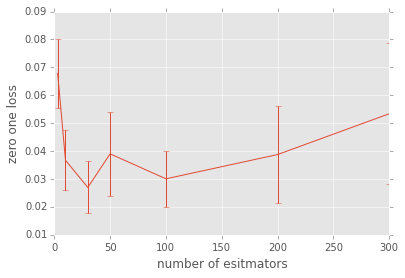

In [65]:
plt.errorbar(parameter, DFresult.T.mean(), yerr = DFresult.T.std())
plt.xlabel("number of esitmators")
plt.ylabel("zero one loss")
plt.savefig("Bagging with Decision Tree")